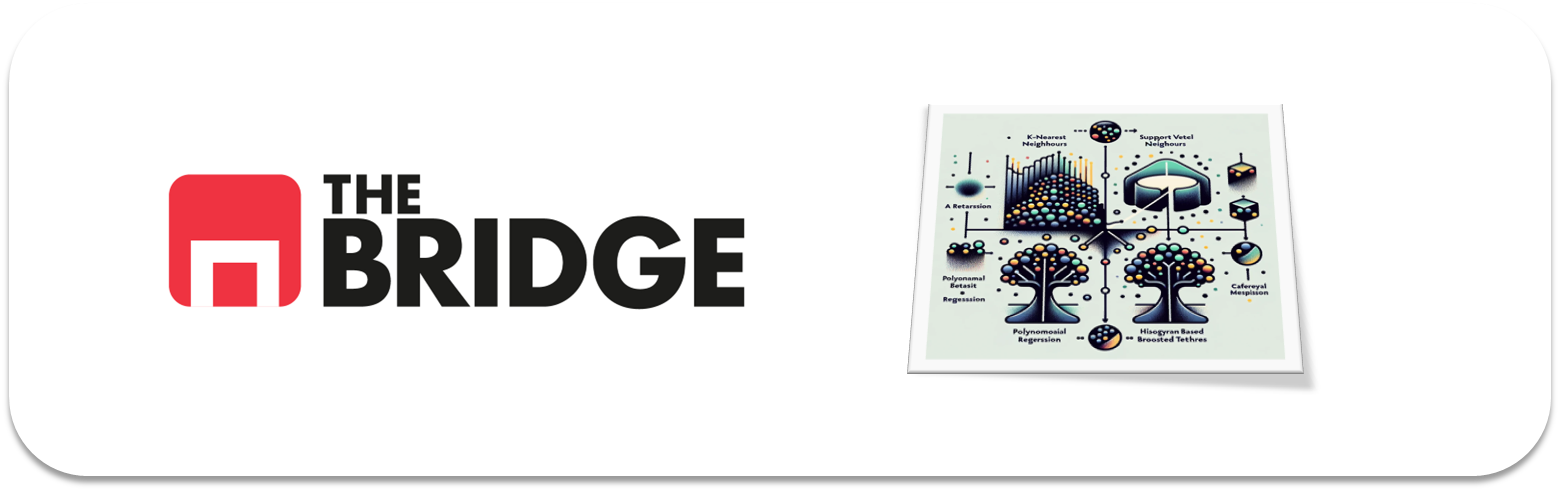

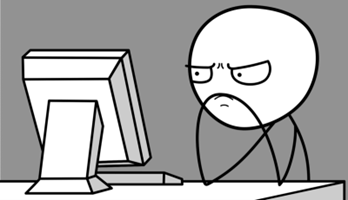

Para hacer un **repaso a los problemas de clasificacion con ML**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### INTRODUCCIóN: PROCESO DE ML

En los siguientes ejercicios vamos a seguir (de nuevo) los pasos básicos en la creación de un modelo de ML para resolver un problema de predicción a partir de un dataset que incluye el target, es decir, un aprendizaje supervisado.

En concreto, vamos a trabajar sobre un problema de clasificación a través de los siguientes pasos:

1. Entendimiento del problema (selección de la métrica más adecuada)  
2. Obtención de datos y primer contacto  
3. Train y Test  
4. MiniEDA: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)  
5. Preparación del dataset de Train: Conversión de categóricas, tratamiento de numéricas  
6. Selección e instanciación de modelos. Baseline.
7. Comparación de modelos (lo haremos por comparación con validación, puedes hacerlo por comparación de modelos de hiperparámetros optimizados, si así lo prefieres)  
8. Selección de modelo: Optimización de hiperparámetros (ten en cuenta la nota de 7)  
9. Equilibrado del train set  
10. Evaluación contra test.  
11. Análisis de errores, posibles acciones futuras.  
12. EXTRA: Persistencia del modelo en disco.  

### El problema

La unidad oncológica del hospital de Madison, Wisconsin, está trabajando en un tratamiento muy prometedor sobre el cáncer de mama. Desgraciadamente es un tratamiento con efectos secundarios y todavía excesivamente caro, pero cuya efectividad es extraordinaria si se aplica en las primeras etpas o incluso antes de haberlo desarrollado. 

En este sentido, la univeridad quiere disponer de un modelo que le permita detectar potenciales pacientes pero con un alto nivel de acierto en detectar quien puede tener cáncer para no aplicar el tratamiento a personas que no fueran a desarrollarlo y por tanto no sólo perder dinero, sino también, y más importante causar problemas a esas personas. 

Nos piden trabajar sobre datos que ya tienen, y que pueden obtener facilmente de cualquier futuro aspirante a las pruebas y ensayos con el tratamiento, de pacientes que desarrollaron y no el cáncer. Sobre ese dataset quieren que les proporcionemos el mejor modelo de predicción de quién desarrollará o no el cáncer y que cumpla con las expectativas del párrafo anterior.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

### Ejercicio 1: Entendiendo el problema de "Negocio"

En función de la descripción del problema de "negocio" y sin mirar todavía los datos, ¿qué tipo de problema de clasificación vamos a resolver? ¿Qué métricas creess más conveniente para medir el rendimiento del modelo a construir y, por tanto, para comparar posibles modelos entre sí?

Es un problema de clasificación binaria. El recall para ver si efectivamente clasifica bien a los potenciales pacientes de cancer.

### Ejercicio 2: Obtención y primer "vistazo"

Carga el dataset, muestra sus primeras filas, su descripción general y determina el tipo de variables que vamos a manejar. Escoge el target y crea una variable `target` y asignalé el nombre de la columna correspondiente.

In [ ]:
import pandas as pd
df = pd.read_csv("./data/wisconsin_cancer.csv", sep="|")
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    fl

NOTA: Para más información sobre el dataset el hospital nos redirige a esta [página web](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

In [6]:
target = df["diagnosis"]
target

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

### Ejercicio 3: Split

Haz el split en train y test.

In [7]:
from sklearn.model_selection import train_test_split

# X son las features (sin la columna 'diagnosis') y y es el target (la columna 'diagnosis')
X = df.drop(columns=['diagnosis'])
y = target

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificar los tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (455, 25)
Tamaño del conjunto de prueba: (114, 25)


### Ejercicio 4: MiniEDA (I)

Analiza la distribución frecuencial de target brevemente.

Distribución frecuencial del target (diagnosis):
diagnosis
B    357
M    212
Name: count, dtype: int64

Porcentaje de cada clase:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


/var/folders/lc/xsbjt6rs2gq59y6tqrhdjzb40000gn/T/ipykernel_14692/375024587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


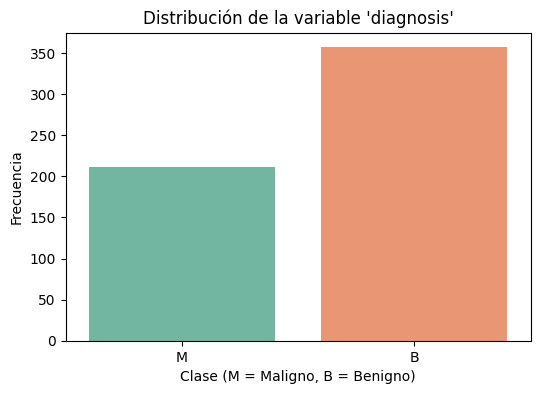

In [8]:
# Análisis frecuencial con pandas
print("Distribución frecuencial del target (diagnosis):")
print(y.value_counts())

# Porcentaje de cada clase
print("\nPorcentaje de cada clase:")
print(y.value_counts(normalize=True) * 100)

# Visualización gráfica con Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='Set2')
plt.title("Distribución de la variable 'diagnosis'")
plt.xlabel("Clase (M = Maligno, B = Benigno)")
plt.ylabel("Frecuencia")
plt.show()


### Ejercicio 5: MiniEDA (II)

Analiza bivariantemente las variables contra el target, de forma que veamos las distintas distribuciones para cada clase (puedes emplear la libería gráfica que crees conveniente)

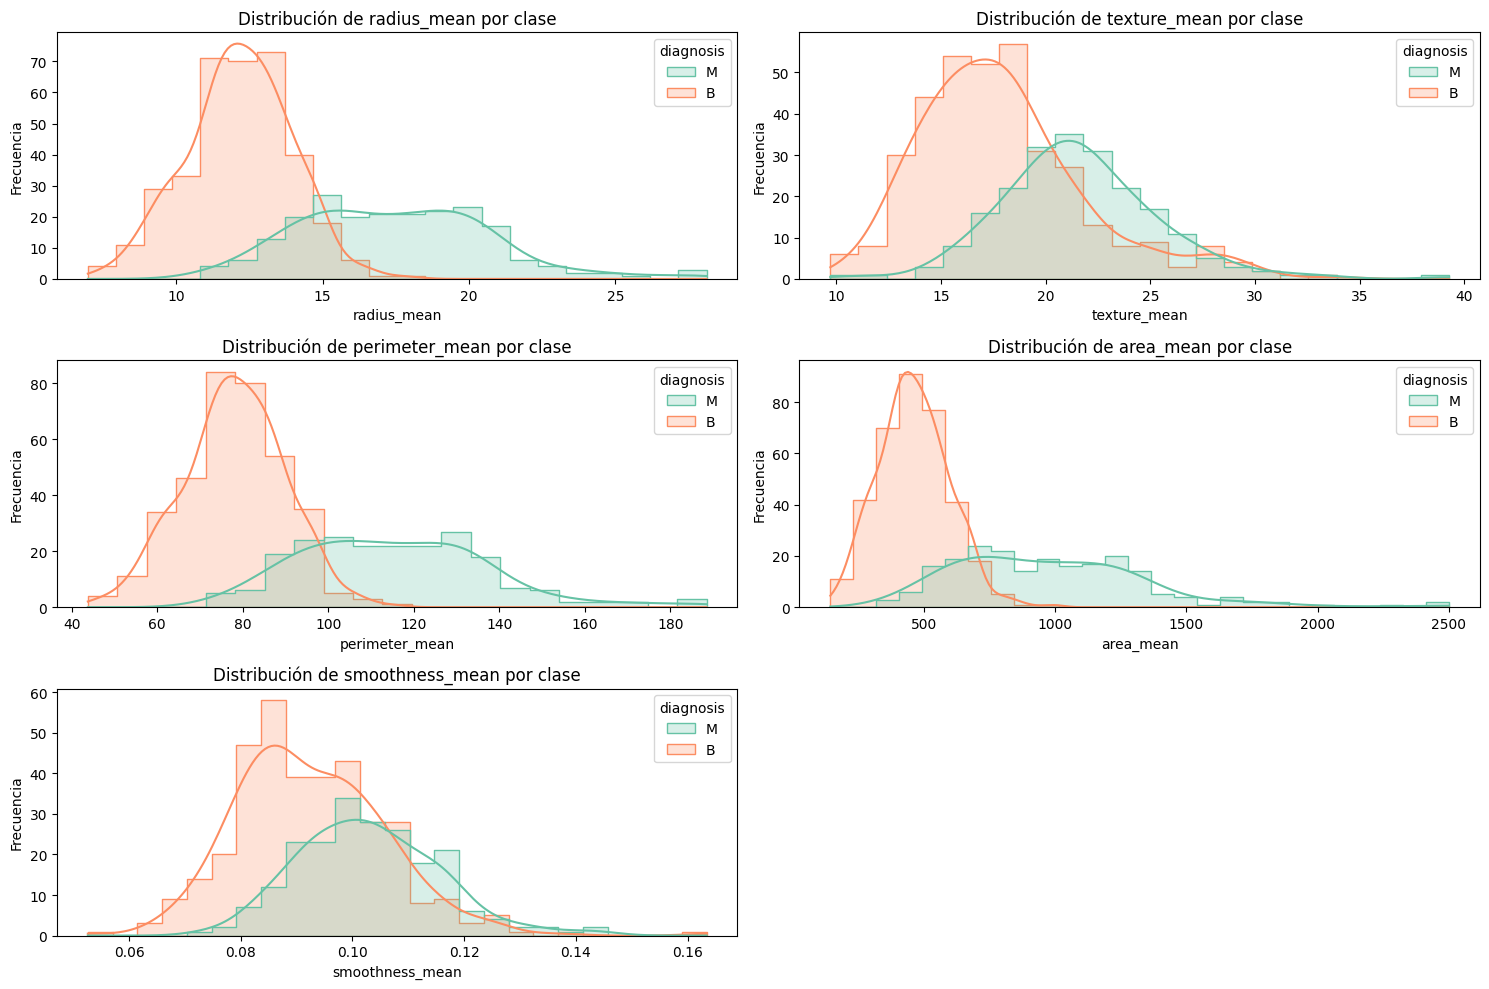

/var/folders/lc/xsbjt6rs2gq59y6tqrhdjzb40000gn/T/ipykernel_14692/3521529523.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='diagnosis', y=var, palette='Set2')
/var/folders/lc/xsbjt6rs2gq59y6tqrhdjzb40000gn/T/ipykernel_14692/3521529523.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='diagnosis', y=var, palette='Set2')
/var/folders/lc/xsbjt6rs2gq59y6tqrhdjzb40000gn/T/ipykernel_14692/3521529523.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='diagnosis', y=var, palette='Set2')
/var/folders/

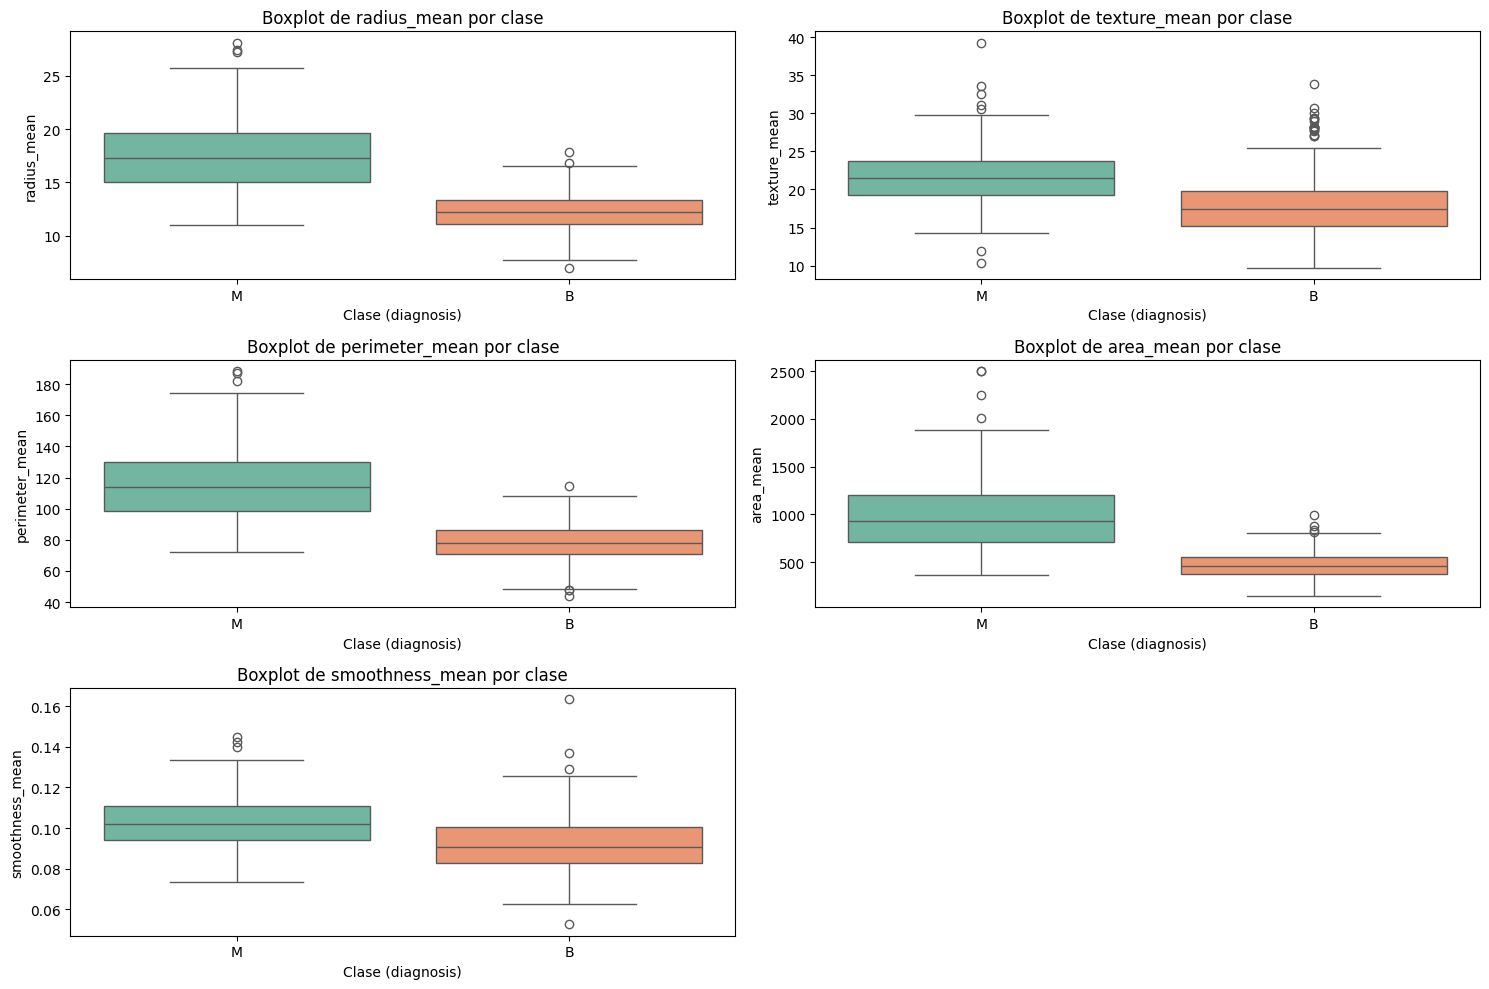

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame combinando las features (X) y el target (y)
data = X.copy()
data['diagnosis'] = y

# Lista de variables para graficar
variables_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Graficar histogramas para cada variable seleccionada
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=data, x=var, hue='diagnosis', kde=True, palette='Set2', element='step')
    plt.title(f'Distribución de {var} por clase')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Graficar boxplots para analizar la diferencia entre clases
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data, x='diagnosis', y=var, palette='Set2')
    plt.title(f'Boxplot de {var} por clase')
    plt.xlabel('Clase (diagnosis)')
    plt.ylabel(var)
plt.tight_layout()
plt.show()


### Ejercicio 6: MiniEDA (III)

Crea una variable de tipo lista a la que asignes los valores de las columnas que creas conveniente emplear como features en función de lo visto en el miniEDA. Haz una lista de modelos/algoritmos que vas a emplear para hacer el modelo (solo los nombres). En función de la lista anterior, ¿tienes que tratar las variables, por qué?

In [10]:
# Lista de columnas seleccionadas como features (basado en el MiniEDA)
selected_features = [
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean'
]

# Lista de modelos/algoritmos a emplear
models = [
    "Logistic Regression",
    "Random Forest"
]

# Tratamientos necesarios en función de los modelos seleccionados
# - Logistic Regression necesita que las variables sean escaladas debido a su sensibilidad a la magnitud de las features.
# - Random Forest no requiere escalado, pero ambas necesitan tratar el desbalance de clases.
treatments_needed = [
    "Escalado de las variables (necesario para Logistic Regression)",
    "Manejo del desbalanceo de clases (necesario para ambos modelos)"
]

# Imprimir los resultados
print("Features seleccionadas:", selected_features)
print("Modelos a emplear:", models)
print("Tratamientos necesarios:", treatments_needed)


Features seleccionadas: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
Modelos a emplear: ['Logistic Regression', 'Random Forest']
Tratamientos necesarios: ['Escalado de las variables (necesario para Logistic Regression)', 'Manejo del desbalanceo de clases (necesario para ambos modelos)']


### Ejercicio 7: Tratamiento de features

Trata las features de manera que puedan ser empleadas por los modelos que escogite en el ejercicio anterior. Recuerda que este es un paso necesario porque los modelos no entienden de primeras de "letras" (salvo alguno que no es que entienda sino que hace sus transformaciones por dentro) y porque en determinados algoritmos es necesario que los rangos de las features estén escalados para que el algoritmo no se decante (érroneamente) por alguna feature sólo porque sus valores son mayores en rango que el de otras. NOTA: Recuerda que lo que le hagas al train, se lo tienes que hacer al test

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42, stratify=y
)

# 2. Escalado de las variables (necesario para Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar el escalador con los datos de train y transformar
X_test_scaled = scaler.transform(X_test)       # Usar el mismo escalador para transformar test

# Resultado
print("Tratamiento de features completado:")
print("- X_train y X_test han sido escalados con StandardScaler.")
print("- El escalado es necesario para Logistic Regression.")
print("- Random Forest no necesita escalado, pero las features escaladas también pueden ser usadas sin problema.")


Tratamiento de features completado:
- X_train y X_test han sido escalados con StandardScaler.
- El escalado es necesario para Logistic Regression.
- Random Forest no necesita escalado, pero las features escaladas también pueden ser usadas sin problema.


### Ejercicio 8: Creación de los dataset de train y test

Crea las parejas X,y de train y test.

In [12]:
# 1. Crear las parejas X, y para train y test

# X_train, X_test ya están creados desde el paso anterior
# y_train, y_test es la variable objetivo, que ya la tenemos

# Si no lo habías hecho aún, asegurémonos de que `y` es la columna 'diagnosis' y `X` las features seleccionadas.
X = df[selected_features]  # Seleccionar las features
y = df['diagnosis']  # Variable objetivo (target)

# Ya hemos dividido los datos previamente con stratified split, pero ahora confirmamos las parejas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Resultado
print("Parejas X, y creadas correctamente para train y test:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


Parejas X, y creadas correctamente para train y test:
X_train shape: (455, 10)
y_train shape: (455,)
X_test shape: (114, 10)
y_test shape: (114,)


### Ejercicio 9: Instanciación de modelos

Importa e instancia los modelos que hayas escogido en el ejercicio 6. En general, no hace falta que asignes ahora ningún hiperparámetro salvo en los basados en árboles en los que debes escoger un max_depth para evitar el sobreajuste inicial. Si quieres emplear la regresión logística es posible que tengas que utilizar un valor de max_iter para que el algoritmo converja.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Instanciar los modelos con hiperparámetros adecuados

# Para Logistic Regression: Aseguramos que el algoritmo converja con un número mayor de iteraciones
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Para Random Forest: Establecemos un valor de max_depth para evitar sobreajuste
random_forest_model = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

# Resultados
print("Modelos instanciados:")
print("- Logistic Regression: max_iter=1000")
print("- Random Forest: max_depth=10")


Modelos instanciados:
- Logistic Regression: max_iter=1000
- Random Forest: max_depth=10


### Ejercicio 10: Comparativa de modelos

Haz la comparativa de modelos empleando cross_val_score (es decir la validación cruzada). Utiliza k = 5, y un scoring acorde a la métrica escogida en el ejercicio 1. Si no tienes clara la métrica entonces emplea el recall_medio y usa scoring = "balanced acuracy". Escoge el modelo ganador.

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Evaluar los modelos utilizando cross-validation con 5 particiones (k=5)
logistic_scores = cross_val_score(logistic_model, X[selected_features], y, cv=5, scoring='balanced_accuracy')
random_forest_scores = cross_val_score(random_forest_model, X[selected_features], y, cv=5, scoring='balanced_accuracy')

# Calcular la media de las puntuaciones para cada modelo
logistic_mean_score = np.mean(logistic_scores)
random_forest_mean_score = np.mean(random_forest_scores)

# Mostrar los resultados de la comparativa
print("Comparativa de modelos (Balanced Accuracy - k=5):")
print(f"Logistic Regression - Puntuación media: {logistic_mean_score:.4f}")
print(f"Random Forest - Puntuación media: {random_forest_mean_score:.4f}")

# Escoger el modelo ganador
if logistic_mean_score > random_forest_mean_score:
    print("Modelo ganador: Logistic Regression")
else:
    print("Modelo ganador: Random Forest")


Comparativa de modelos (Balanced Accuracy - k=5):
Logistic Regression - Puntuación media: 0.9065
Random Forest - Puntuación media: 0.9382
Modelo ganador: Random Forest


### Ejercicio 11: Ajuste de hiperparámetros

Escoge un grid para ajustar los hiperparámetros de tu modelo. Crea un objeto GridSearch y "ajustalo" (emplea su método fit) para encontrar la mejor combinaciónde hiperparámetros empleando la métrica que decidimos en el ejercio 1. Si no lo tienes claro emplea "balance accuracy". Por otro lado, incluye en el grid, el hiperparámetro que permita que el modelo "compense" el desbalanceo del dataset de entrada, aunque este no lo tenga.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Definir los grids de hiperparámetros para cada modelo

# Para Logistic Regression
logistic_param_grid = {
    'C': [0.1, 1, 10],  # Regularización
    'solver': ['liblinear', 'saga'],  # Solvers disponibles
    'max_iter': [500, 1000],  # Número de iteraciones
    'class_weight': ['balanced', None]  # Ajustar el desbalanceo
}

# Para Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [5, 10, 20],  # Profundidad máxima de los árboles
    'class_weight': ['balanced', None]  # Ajustar el desbalanceo
}

# 2. Instanciar los modelos
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# 3. Crear objetos GridSearchCV con validación cruzada y scoring 'balanced_accuracy'
logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5, scoring='balanced_accuracy')
random_forest_grid_search = GridSearchCV(random_forest_model, rf_param_grid, cv=5, scoring='balanced_accuracy')

# 4. Ajustar los modelos a los datos de entrenamiento
logistic_grid_search.fit(X_train_scaled, y_train)  # Usamos los datos escalados
random_forest_grid_search.fit(X_train, y_train)  # Random Forest no necesita escalado

# 5. Resultados de los mejores hiperparámetros
print("Mejores parámetros para Logistic Regression:")
print(logistic_grid_search.best_params_)

print("Mejores parámetros para Random Forest:")
print(random_forest_grid_search.best_params_)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

Mejores parámetros para Logistic Regression:
{'C': 1, 'class_weight': 'balanced', 'max_iter': 500, 'solver': 'liblinear'}
Mejores parámetros para Random Forest:
{'class_weight': None, 'max_depth': 20, 'n_estimators': 50}


### Ejercicio 12: Evaluación del modelo

Evalúa el modelo contra el dataset de test. Muestra el informe de clasificación y haz una valoración de si el hospital aceptaría el modelo o no.

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar Logistic Regression con los mejores parámetros
best_logistic_model = logistic_grid_search.best_estimator_
best_logistic_model.fit(X_train_scaled, y_train)

# Entrenar Random Forest con los mejores parámetros
best_rf_model = random_forest_grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Evaluar Logistic Regression en el conjunto de test
y_pred_logistic = best_logistic_model.predict(X_test_scaled)
print("Evaluación de Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

# Evaluar Random Forest en el conjunto de test
y_pred_rf = best_rf_model.predict(X_test)
print("Evaluación de Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Evaluación de Logistic Regression:
              precision    recall  f1-score   support

           B       0.97      0.92      0.94        72
           M       0.87      0.95      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

[[66  6]
 [ 2 40]]
Evaluación de Random Forest:
              precision    recall  f1-score   support

           B       0.94      0.94      0.94        72
           M       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

[[68  4]
 [ 4 38]]


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Evaluar el modelo Random Forest en el conjunto de test
y_pred_rf = best_rf_model.predict(X_test)
print("Evaluación de Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# 2. Evaluar el modelo Logistic Regression en el conjunto de test
y_pred_logistic = best_logistic_model.predict(X_test_scaled)
print("Evaluación de Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

# 3. Valoración del modelo basado en el recall y las métricas
print("\nValoración del modelo:")
# Analizamos el recall de la clase 'M' (cáncer)

# Para Random Forest
rf_classification_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_recall = rf_classification_report['M']['recall']

# Para Logistic Regression
logistic_classification_report = classification_report(y_test, y_pred_logistic, output_dict=True)
logistic_recall = logistic_classification_report['M']['recall']

# Determinar si el modelo es aceptable según el recall
print(f"\nRecall del modelo Random Forest para la clase 'M' (cáncer): {rf_recall:.4f}")
print(f"Recall del modelo Logistic Regression para la clase 'M' (cáncer): {logistic_recall:.4f}")

# Se considera aceptable si el recall es alto, como mínimo 0.85
acceptable_recall_threshold = 0.85

if rf_recall >= acceptable_recall_threshold:
    print("El modelo Random Forest es aceptable para el hospital.")
else:
    print("El modelo Random Forest no es aceptable para el hospital.")

if logistic_recall >= acceptable_recall_threshold:
    print("El modelo Logistic Regression es aceptable para el hospital.")
else:
    print("El modelo Logistic Regression no es aceptable para el hospital.")


Evaluación de Random Forest:
              precision    recall  f1-score   support

           B       0.94      0.94      0.94        72
           M       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

[[68  4]
 [ 4 38]]
Evaluación de Logistic Regression:
              precision    recall  f1-score   support

           B       0.97      0.92      0.94        72
           M       0.87      0.95      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

[[66  6]
 [ 2 40]]

Valoración del modelo:

Recall del modelo Random Forest para la clase 'M' (cáncer): 0.9048
Recall del modelo Logistic Regression para la clase 'M' (cáncer): 0.9524
El modelo Random Forest es aceptable para el hospital.
El modelo Logistic Regre

### Ejercicio 13: Análisis de errores

Muestra la matriz de confusión con los porcentajes de precisión (emplea ConfusionMatrixDisplay.from_predictions con el argumento normalize con el valor adecuado). Haz un pequeño análisis.

Matriz de Confusión para Random Forest:


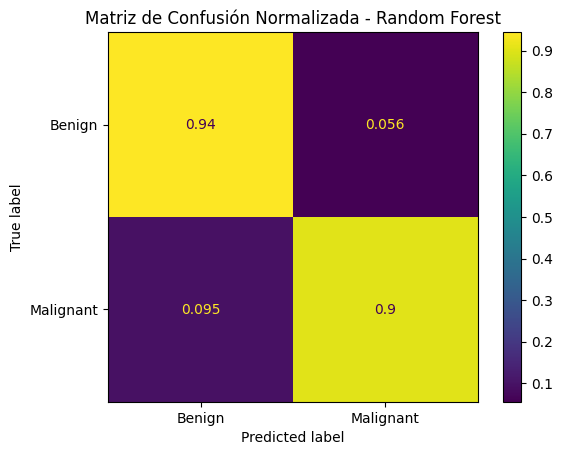

Matriz de Confusión para Logistic Regression:


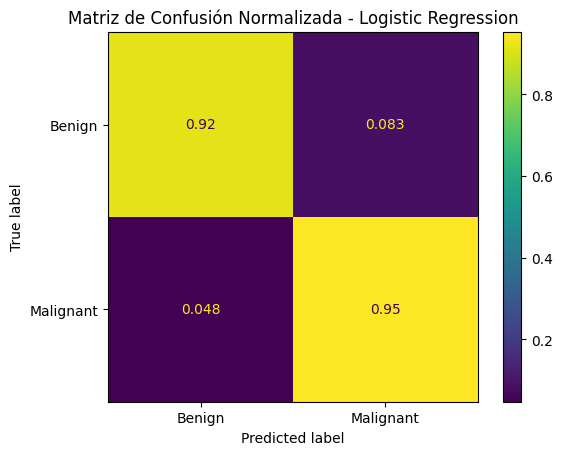

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Mostrar la matriz de confusión normalizada para Random Forest
print("Matriz de Confusión para Random Forest:")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, normalize='true', display_labels=['Benign', 'Malignant']
)
plt.title("Matriz de Confusión Normalizada - Random Forest")
plt.show()

# 2. Mostrar la matriz de confusión normalizada para Logistic Regression
print("Matriz de Confusión para Logistic Regression:")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_logistic, normalize='true', display_labels=['Benign', 'Malignant']
)
plt.title("Matriz de Confusión Normalizada - Logistic Regression")
plt.show()


### EXTRA: 

Busca en Internet o pregúntale a tu AI preferida, cómo se graba un modelo en disco y gúardalo en "./models/cancer_pred" con la extesión apropiada.